In [1]:
from models import unetnc
import numpy as np
import pickle as pkl
import cv2
import torch
import cv2

DATA_PATH = 'Dataset Preview/Inv3D preview/data/'
# warped WC sind die 3D Koordinaten nach dem ersten Modell bzw. dewarpnet -> Ground Truth

In [35]:
from pathlib import Path
data_dir= 'Dataset Preview/Inv3D preview complete/data/train/'
p = Path('./')
folder = list(p.glob(data_dir + '*/'))

In [36]:
folder

[PosixPath('Dataset Preview/Inv3D preview complete/data/train/06'),
 PosixPath('Dataset Preview/Inv3D preview complete/data/train/07'),
 PosixPath('Dataset Preview/Inv3D preview complete/data/train/09'),
 PosixPath('Dataset Preview/Inv3D preview complete/data/train/01'),
 PosixPath('Dataset Preview/Inv3D preview complete/data/train/05'),
 PosixPath('Dataset Preview/Inv3D preview complete/data/train/04'),
 PosixPath('Dataset Preview/Inv3D preview complete/data/train/08')]

In [19]:
for item in folder:
    path = str(item) + '/warped_WC.npz')
    wc_gt = np.load(path)['warped_WC']


Dataset Preview/Inv3D preview complete/data/train/06/warped_WC.npz
Dataset Preview/Inv3D preview complete/data/train/07/warped_WC.npz
Dataset Preview/Inv3D preview complete/data/train/09/warped_WC.npz
Dataset Preview/Inv3D preview complete/data/train/01/warped_WC.npz
Dataset Preview/Inv3D preview complete/data/train/05/warped_WC.npz
Dataset Preview/Inv3D preview complete/data/train/04/warped_WC.npz
Dataset Preview/Inv3D preview complete/data/train/08/warped_WC.npz


In [21]:

trainimage_gt = np.load(DATA_PATH + 'train/06/warped_WC.npz')

In [22]:
img_t = trainimage_gt['warped_WC']
#img_t = torch.from_numpy(img).float()

In [31]:

img_t = img_t.transpose(2,0,1)

In [32]:
img_t[0].shape

(256, 256)

In [34]:
np.amax(img_t[0])
np.amin(img_t[0])

-0.26865804

In [64]:
#normalize label
lbl = img_t
msk=((lbl[:,:,0]!=0)&(lbl[:,:,1]!=0)&(lbl[:,:,2]!=0)).astype(np.uint8)*255
xmx, xmn, ymx, ymn,zmx, zmn= 1.2539363, -1.2442188, 1.2396319, -1.2289206, 0.6436657, -0.67492497   # calculate from all the wcs
lbl[:,:,0]= (lbl[:,:,0]-zmn)/(zmx-zmn)
lbl[:,:,1]= (lbl[:,:,1]-ymn)/(ymx-ymn)
lbl[:,:,2]= (lbl[:,:,2]-xmn)/(xmx-xmn)
lbl=cv2.bitwise_and(lbl,lbl,mask=msk)
#lbl = cv2.resize(lbl, self.img_size, interpolation=cv2.INTER_NEAREST)
lbl = lbl.transpose(2, 0, 1)   # NHWC -> NCHW
lbl = np.array(lbl, dtype=np.float64)
lbl

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [65]:
lbl.shape

(3, 256, 256)

In [79]:
type(trainimage_gt['warped_WC'])

numpy.ndarray

In [5]:
#np.load(DATA_PATH + 'train/06/warped_document.png')

In [87]:
from numpy import asarray
from PIL import Image
image = Image.open(DATA_PATH + 'train/01/warped_document.png')
# convert image to numpy array
img = asarray(image)
#img = m.imresize(img, self.img_size) # uint8 with RGB mode
if img.shape[-1] == 4:
    img=img[:,:,:3]   # Discard the alpha channel  
img = img[:, :, ::-1] # RGB -> BGR
# plt.imshow(img)
# plt.show()
img = img.astype(float) / 255.0
img = img.transpose(2, 0, 1) # NHWC -> NCHW


In [89]:
img.shape

(3, 256, 256)

In [1]:
DATA_PATH = 'Dataset Preview/Inv3D preview/data/'

from custom_dataset import CustomImageDataset_wc
from custom_dataset import Dataset_backward_mapping
train_dataset_bm = Dataset_backward_mapping(data_dir=DATA_PATH+'train/')
trainloader = data.DataLoader(train_dataset_bm, batch_size=1, num_workers=8, shuffle=True)
#train_dataset = CustomImageDataset_wc(data_dir=DATA_PATH+'train/', transform=True)

#train_dataset = CustomImageDataset_wc(data_dir=DATA_PATH+'train/', transform=False)

from models import unetnc
model = unetnc.UnetGenerator(input_nc=3, output_nc=6, num_downs=3)
#model.to('cuda')
from torch.autograd import Variable

In [2]:
#for param in model.parameters():
 #   param.requires_grad = False
#for param in model.parameters():
    #print(param)

In [3]:
from torch.utils import data
#data_loader = get_loader('doc3dwc')
#data_path = args.data_path
#t_loader = data_loader(data_path, is_transform=True, img_size=(args.img_rows, args.img_cols), augmentations=True)
#v_loader = data_loader(data_path, is_transform=True, split='val', img_size=(args.img_rows, args.img_cols))

#n_classes = t_loader.n_classes
#trainloader = data.DataLoader(train_dataset, batch_size=1, num_workers=8, shuffle=True)

#valloader = data.DataLoader(v_loader, batch_size=args.batch_size, num_workers=8)

In [4]:
for image, labels in trainloader:
    #print(item)
    pass
#img = Variable(item['image'])#.to('cuda'))  #images = Variable(images.cuda())
#img.size()

In [7]:
image.shape

torch.Size([1, 3, 256, 256])

In [6]:
image

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])

In [10]:
output = model(image)

In [15]:
output.shape

torch.Size([1, 6, 256, 256])

In [17]:
output[0].shape

torch.Size([2, 256, 256])

In [ ]:
from torch.autograd import Variable
for i, (images, labels) in enumerate(trainloader):
    print(i)
    print(images)
    print(labels)
    #images = Variable(images.cuda())
    #labels = Variable(labels.cuda())

    #optimizer.zero_grad()
    outputs = model(images)
    '''pred=htan(outputs)
    g_loss=gloss(pred, labels)
    l1loss = loss_fn(pred, labels)
    loss=l1loss#+(0.2*g_loss)
    avg_l1loss+=float(l1loss)
    avg_gloss+=float(g_loss)
    avg_loss+=float(loss)
    train_mse+=float(MSE(pred, labels).item())

    loss.backward()
    optimizer.step()
    global_step+=1'''
    print('lakshooOOOO')
    print(outputs)

In [ ]:
model = MyLightningModule()

trainer = Trainer()
trainer.fit(model, train_dataloader, val_dataloader)
trainer.validate(val_dataloaders=val_dataloaders)
trainer.test(test_dataloaders=test_dataloaders)

### Pytorch Lightning Training

In [4]:
import cv2
import numpy as np
import pytorch_lightning as pl
from models.densenetccnl import Backwardmapper
DATA_PATH = 'Dataset Preview/Inv3D preview complete/data/'
data_dir= 'Dataset Preview/Inv3D preview complete/data/train/'

from custom_dataset import CustomImageDataset_wc
dataset_train = CustomImageDataset_wc(data_dir=DATA_PATH+'train/', transform=True)
dataset_val = CustomImageDataset_wc(data_dir=DATA_PATH+'val/', transform=True)
dataset_test = CustomImageDataset_wc(data_dir=DATA_PATH+'test/', transform=True)

from custom_dataset import Dataset_backward_mapping
train_dataset_bm = Dataset_backward_mapping(data_dir=DATA_PATH+'train/')



from torch.utils.data import DataLoader
train_loader_bm = DataLoader(train_dataset_bm, batch_size=1, num_workers=8, shuffle=True)

train_loader = DataLoader(dataset_train, batch_size= 1, num_workers=12)
val_loader = DataLoader(dataset_val, batch_size= 1, num_workers=12)
test_loader = DataLoader(dataset_test, batch_size= 1, num_workers=12)

from models import unetnc
model = unetnc.Estimator3d(input_nc=3, output_nc=3, num_downs=0)
model_bm = Backwardmapper()

#8 channel


# most basic trainer, uses good defaults (auto-tensorboard, checkpoints, logs, and more)
# trainer = pl.Trainer(gpus=8) (if you have GPUs)
trainer = pl.Trainer(gpus=1, max_epochs = 200)
#trainer = pl.Trainer(auto_select_gpus = True, max_epochs = 100)
#trainer.fit(model, train_loader)

# Wie sieht der Batch aus, der vom trainer und train_loader generiert wird?

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [10]:
trainer.fit(model_bm, train_loader_bm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type                | Params
------------------------------------------------
0 | encoder | waspDenseEncoder128 | 21.9 M
1 | decoder | waspDenseDecoder128 | 23.8 M
------------------------------------------------
45.7 M    Trainable params
0         Non-trainable params
45.7 M    Total params
182.997   Total estimated model params size (MB)
Epoch 199: 100%|██████████| 7/7 [00:00<00:00,  8.36it/s, loss=0.0741, v_num=36]


In [2]:
CustomImageDataset_wc.calculate_min_and_max(data_dir)

(1.0858383, -1.0862498, 0.8847823, -0.8838696, 0.31327668, -0.30930856)

In [89]:
for batch in train_loader_bm:
    images, labels = batch


In [11]:
import numpy as np
lbl = np.load(data_dir + '01/warped_WC.npz')['warped_WC']

In [25]:
def l_angle_def(theta_x, theta_y, theta_x_gt, theta_y_gt , type = 'paper'):
    if type == 'paper':
        l_x = (torch.abs(theta_x - theta_x_gt) - math.pi) % (2*math.pi)
        l_y = (torch.abs(theta_y - theta_y_gt) - math.pi) % (2*math.pi)
        l_angle = l_x + l_y
        return l_angle
    else:
        l_x = (torch.abs(theta_x - theta_x_gt) - math.pi) % (math.pi)
        l_y = (torch.abs(theta_y - theta_y_gt) - math.pi) % (math.pi)
        l_angle = l_x + l_y
        return l_angle
l_angle = l_angle_def(theta_x, theta_y, theta_x_gt, theta_y_gt , type = 'paper')

In [13]:
import numpy as np
data_dir= 'Dataset Preview/Inv3D preview complete/data/train/'
img = np.load(data_dir + '01/warped_WC.npz')['warped_WC']
bm = np.load(data_dir + '01/warped_BM.npz')['warped_BM']

In [49]:
import torch.nn.functional as F
#@staticmethod
def unwarp_image(img, bm):
    assert bm.shape[3] == 2, "BM shape needs to be (N, H, W, C)"

    n, c, h, w = img.shape

    bm = bm.transpose(3, 2).transpose(2, 1)
    bm = F.interpolate(bm, size=(h, w), mode='bilinear', align_corners=True) # align_corners=True -> old behaviour
    bm = bm.transpose(1, 2).transpose(2, 3)

    img = img.float()
    res = F.grid_sample(input=img, grid=bm, align_corners=True) # align_corners=True -> old behaviour
    res = torch.clamp(res, 0, 1) # clip values because of numerical instabilities
    return res 

In [84]:
data_path = 'Dataset Preview/Inv3D preview/data/train/09'
input = np.load(data_path + '/warped_WC.npz')['warped_WC']

labels = {}
labels['warped_bm'] = np.load(data_path + '/warped_BM.npz')['warped_BM']
input, labels = train_dataset_bm.transform_data(input,labels)
x = labels['warped_bm']
print(x.shape)

import torch
#x = torch.transpose(labels['warped_bm'],1,2)#NCHW
#x = torch.transpose(x,2,3)
#x = x*255

import cv2
img = cv2.imread('Dataset Preview/Inv3D preview/data/train/09/warped_document.png')
img = dataset_train.transform_img(img)
img = img.unsqueeze(0)#.transpose(2,3).transpose
print(img.shape)
'''img = img[np.newaxis,:,:,:]
img = torch.from_numpy(img)
print(img.shape)
img = torch.transpose(img,2,3)
img = torch.transpose(img,1,2)'''
#print(img)
#img = img / 255
#print(img.shape)

unwarped_img = unwarp_image(img,x)
unwarped_img = torch.transpose(unwarped_img,1,2)
unwarped_img = torch.transpose(unwarped_img,2,3)

torch.Size([2, 448, 448])
torch.Size([1, 3, 256, 256])


IndexError: tuple index out of range

In [88]:
data_path = 'Dataset Preview/Inv3D preview/data/train/01'
np.load(data_path + '/warped_BM.npz')['warped_BM'].shape

(448, 448, 2)

In [63]:
train_dataset_bm.transform_data()

torch.Size([3, 256, 256])

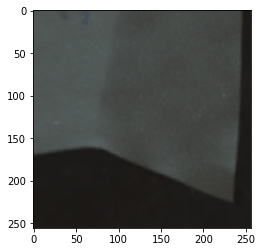

In [82]:
import matplotlib.pyplot as plt
plt.imshow(unwarped_img.numpy()[0])

In [57]:
x.shape

torch.Size([1, 256, 256, 2])

In [21]:
x.shape

torch.Size([1, 256, 256, 2])

In [22]:
labels['warped_bm'].shape #NCHW

torch.Size([1, 2, 256, 256])

In [2]:

img = cv2.imread('Dataset Preview/Inv3D preview/data/train/09/warped_document.png') 
cv2.imshow('img', img)
cv2.waitKey(0) 
  
#closing all open windows 
cv2.destroyAllWindows() 


In [15]:
bm.shape

(256, 256, 2)

In [16]:
img.shape

(256, 256, 3)

In [17]:
images.shape

torch.Size([1, 3, 256, 256])

In [21]:
labels['warped_bm'].shape

torch.Size([1, 2, 256, 256])

torch.Size([1, 256, 256, 2])